<a href="https://colab.research.google.com/github/sirsjosh/Computer-Vision/blob/main/Gausian_blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gaussian Blur, Medical Images**

**Import resources and display image**

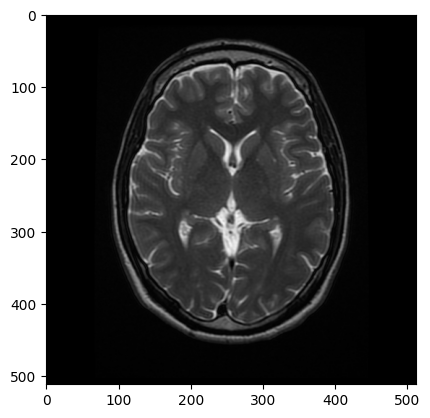

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib

%matplotlib inline

# Read in the image
url = 'https://github.com/udacity/cd0360-Introduction-to-Computer-Vision/blob/main/1_2_Convolutional_Filters_Edge_Detection/images/brain_MR.jpg?raw=true'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()),dtype = np.uint8)
image = cv2.imdecode(arr, -1)

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

**Gaussian blur the image**

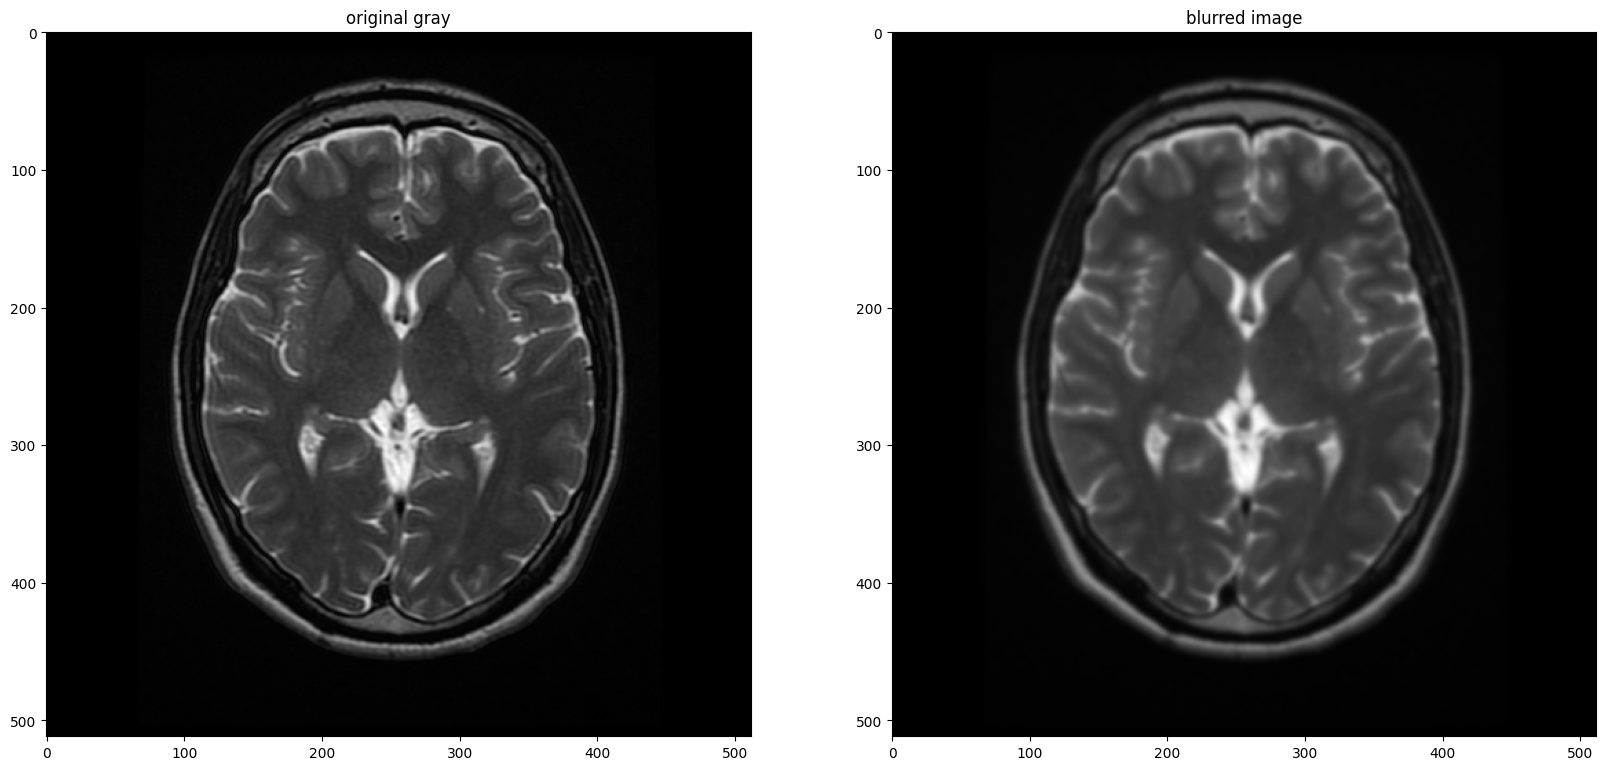

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

**Test performance with a high-pass filter**

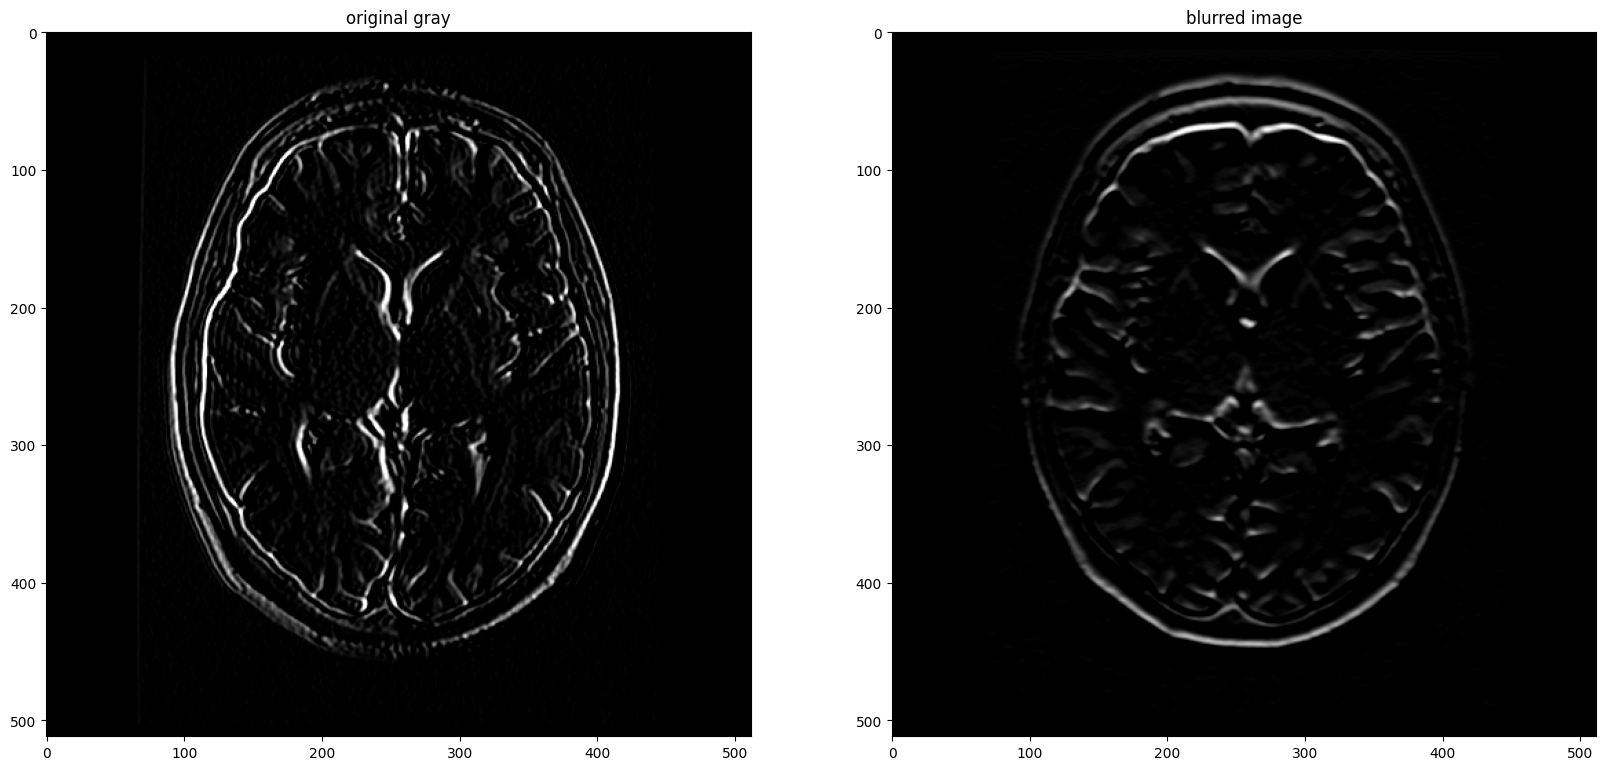

In [4]:
# High-pass filter

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1],
                   [ -2, 0, 2],
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

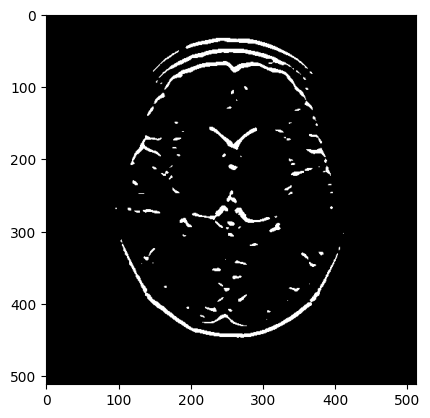

In [5]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')